In [1]:
import brainsurf.data.csv as csv_import
file_path = 'brainsurf/data/samples/adarsh/adarsh_pre_med.csv'
adarsh_pre_med = csv_import.convert_csv_to_eegdata(file_path)
data_summary = adarsh_pre_med.summary(300)

       sec        raw
0    0.000 -16.534400
1    0.005 -23.730500
2    0.010 -24.639900
3    0.015 -22.241200
4    0.020 -19.952400
..     ...        ...
295  1.475  -0.976563
296  1.480  -4.052730
297  1.485  -3.845210
298  1.490  -1.745610
299  1.495   3.674320

[300 rows x 2 columns]


In [2]:
adarsh_pre_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_pre_cog.csv')
adarsh_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_med.csv')
adarsh_post_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')
adarsh_post_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')

In [3]:
adarsh_pre_med.extract_frequency_bands()
adarsh_pre_cog.extract_frequency_bands()
adarsh_med.extract_frequency_bands()
adarsh_post_med.extract_frequency_bands()
adarsh_post_cog.extract_frequency_bands()

In [4]:
summary = adarsh_pre_med.summary(10)

     sec      raw     alpha      beta       delta     theta     gamma
0  0.000 -16.5344  0.739153  0.340532   49.747628  4.116308  0.040695
1  0.005 -23.7305  1.676459  0.749908   42.575573  3.634073  0.038842
2  0.010 -24.6399  3.382342  2.419534  135.210048  3.892357  0.125695
3  0.015 -22.2412  1.434365  1.619343   84.618161  3.953389  0.087822
4  0.020 -19.9524  4.340995  6.558143   78.591010  5.409474  0.729613
5  0.025 -18.4143  0.908967  0.688162   34.664515  1.957621  0.036741
6  0.030 -20.9778  1.791933  1.296061   83.958023  3.180223  0.098377
7  0.035 -20.2393  1.976249  1.150905   34.516828  2.102519  0.058791
8  0.040 -21.4050  0.469199  0.218817   29.096778  1.206942  0.010982
9  0.045 -21.0022  0.614998  0.385991   70.191149  3.794692  0.018610


In [5]:
import numpy as np
import brainsurf.utils.data as util
values = np.asarray(adarsh_pre_cog['sec'], dtype=object)
sampling_freq = util.estimate_sampling_frequency(values)
print(sampling_freq)

200.00000000000003


In [6]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30

In [7]:
import brainsurf.visualization.plot_eeg_signal as plt
import brainsurf.preprocessing.filtering as filter

bandpass_filtered_pre_med_eeg = filter.butter_bandpass_filter(adarsh_pre_med['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_pre_cog_eeg = filter.butter_bandpass_filter(adarsh_pre_cog['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_med_eeg = filter.butter_bandpass_filter(adarsh_med['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_post_med_eeg = filter.butter_bandpass_filter(adarsh_post_med['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_post_cog_eeg = filter.butter_bandpass_filter(adarsh_post_med['raw'], lowcut, highcut, sampling_freq, order) 


In [8]:
print(bandpass_filtered_med_eeg)

[  0.93205546   4.40512426   7.97716605 ... -11.2511049   -7.36394374
  -1.08834323]


In [9]:
adarsh_pre_cog.dropna()
adarsh_post_cog.dropna()

# Comparitive Analysis

In [10]:
min_len = min(len(adarsh_pre_cog), len(adarsh_post_cog))
pre_merged_df = adarsh_pre_cog[:min_len]
post_merged_df = adarsh_post_cog[:min_len]
print(min_len)
len(pre_merged_df)

21


21

In [11]:
# change the location of function
import brainsurf.cognitive_analysis_module.cognitive_comparision as cognitiveComp

cognitive_stats = cognitiveComp.analyze_eeg_data(pre_merged_df,post_merged_df)
cognitive_stats

,Feature,T-Stat,P-Value (T-Test),F-Stat,P-Value (ANOVA),Effect Size
0,EEG,8.139738,5.115667e-10,66.255341,5.115667e-10,2.634322
1,Alpha,-0.507390,6.146674e-01,0.257445,6.146674e-01,0.136628
2,Beta,-8.657478,1.038907e-10,74.951921,1.038907e-10,4.046542
3,Theta,1.770214,8.431342e-02,3.133656,8.431342e-02,0.789284
4,Delta,-0.141509,8.881781e-01,0.020025,8.881781e-01,0.115006


# Cognitive Analysis

In [12]:
adarsh_pre_cog.dropna()
adarsh_post_cog.dropna()
adarsh_pre_cog.summary(5)

      sec       raw     alpha      beta      delta     theta     gamma
0  74.000 -5.224610  0.402189  0.190739  18.862726  1.974057  0.007472
1  74.005 -4.351810  0.275272  0.158867   5.444490  1.028094  0.005800
2  74.010 -2.026370  0.354565  0.159501   6.025449  1.288724  0.005955
3  74.015  0.030518  0.320697  0.134610   5.178307  1.446696  0.007705
4  74.020 -1.025390  0.355913  0.190410   6.233101  1.520567  0.008599


In [13]:
import brainsurf.cognitive_analysis_module.cognitive_comparision as cognitiveComp

cog_idx_before, cog_idx_after= cognitiveComp.calculate_cognitive_indexes(pre_merged_df, post_merged_df)
test_statistic, p_value = cognitiveComp.compare_cognitive_indexes(cog_idx_before, cog_idx_after)

In [14]:
# Print the test statistic and p-value
print("Test Statistic:", test_statistic)
print("P-value:", p_value)

Test Statistic: [-0.99518372  0.9226197   0.91791643  0.89852547  0.84429538  0.85189756
  0.89173221  0.40230339  0.73463684  0.56884675  0.85744207  0.62601931
  0.64137646  0.88845388  0.8493513   0.63550799  0.9032983   0.8801228
  0.88867023  0.85168052  0.66323724]
P-value: [0.39299854 0.42425165 0.42635432 0.43512354 0.46051089 0.45687496
 0.43823394 0.71440993 0.51577508 0.60925948 0.45423905 0.57569573
 0.56691478 0.4397421  0.45808997 0.5702584  0.43295012 0.44359563
 0.43964243 0.45697842 0.55458923]


In [15]:
import pandas as pd
# Create a dictionary with column names and data
data = {
    'Performance Eval Before': cog_idx_before[0],
    'Arousal Index Before': cog_idx_before[1],
    'Neural Activity Before': cog_idx_before[2],
    'Engagement Before': cog_idx_before[3],
    'Performance Eval After': cog_idx_after[0],
    'Arousal Index After': cog_idx_after[1],
    'Neural Activity After': cog_idx_after[2],
    'Engagement After': cog_idx_after[3]
}

df = pd.DataFrame(data)
df

,Performance Eval Before,Arousal Index Before,Neural Activity Before,Engagement Before,Performance Eval After,Arousal Index After,Neural Activity After,Engagement After
0,0.474251,0.203737,35.142222,0.125976,0.358704,0.100207,108.459127,0.079917
1,0.577129,0.267749,14.909014,0.239392,0.762579,0.502025,6.672930,0.306248
2,0.449850,0.275128,14.228092,0.272725,0.547396,0.567826,8.366641,0.246849
3,0.419741,0.221676,14.550626,0.341307,0.802361,0.406141,7.702556,0.303154
4,0.534990,0.234066,14.192467,0.301051,1.181544,0.294206,8.212776,0.303011
5,0.531360,0.275972,16.776897,0.209515,1.499085,0.529121,5.889541,0.225273
6,0.707589,0.233806,15.108271,0.245197,1.122764,0.591972,5.511180,0.268667
7,0.289341,0.314632,9.601689,0.454089,1.334094,0.348601,7.761349,0.253728
8,0.549115,0.419094,9.394484,0.278301,1.333230,0.318947,5.133937,0.467619
9,0.478109,0.339415,9.615644,0.350257,1.345325,0.334956,7.238932,0.284835


From the analysis of the EEG data, we can infer the following:

1. EEG: There is a significant difference between the pre-merged and post-merged groups, as indicated by the high t-statistic (8.139738) and low p-value (5.115667e-10). The effect size (2.634322) suggests a large difference between the groups.

2. Alpha: The t-statistic (-0.507390) and p-value (0.6146674) indicate no significant difference between the pre-merged and post-merged groups. The effect size (0.136628) suggests a small difference between the groups.

3. Beta: There is a significant difference between the pre-merged and post-merged groups, as indicated by the high t-statistic (-8.657478) and low p-value (1.038907e-10). The effect size (4.046542) suggests a large difference between the groups.

4. Theta: The t-statistic (1.770214) and p-value (0.08431342) indicate no significant difference between the pre-merged and post-merged groups. The effect size (0.789284) suggests a moderate difference between the groups.

5. Delta: The t-statistic (-0.141509) and p-value (0.8881781) indicate no significant difference between the pre-merged and post-merged groups. The effect size (0.115006) suggests a small difference between the groups.

Based on these results, we can conclude that the changes in the EEG and Beta waves are statistically significant, indicating a significant difference between the pre-merged and post-merged groups. However, there are no significant differences in the Alpha, Theta, and Delta waves between the two groups.

# Stroop Test Analysis

In [16]:
file_path = 'brainsurf/data/samples/stroop.csv'
stroop_adarsh_pre = pd.read_csv(file_path)
stroop_adarsh_pre

,color1,color2,Congruent,Response Time,Accuracy,Trial,Block,ID
0,red,yellow,0,5,4,1,1894,1
1,yellow,green,0,2,2,1,1431,1
2,red,red,1,8,1,3,2000,1
3,blue,blue,1,15,3,1,1838,1
4,yellow,blue,0,3,4,2,1263,1
5,green,red,0,12,1,1,1430,1
6,green,red,0,12,1,1,1347,1
7,red,green,0,6,2,1,1093,1
8,yellow,yellow,1,1,4,1,1874,1
9,blue,green,0,14,1,3,2000,1


In [17]:
cognitiveComp.analyze_stroop_data(stroop_adarsh_pre)

Response Time Analysis:
Average Response Time - Congruent: 9.18
Average Response Time - Incongruent: 8.59
T-Test - Response Time: t-value = 0.35, p-value = 1.9355

Accuracy Analysis:
Average Accuracy - Congruent: 236.36%
Average Accuracy - Incongruent: 231.03%
T-Test - Accuracy: t-value = 0.13, p-value = 1.9726


Response Time Analysis:

The average response time for congruent trials (where Color 1 and Color 2 are congruent) is 9.18 units.
The average response time for incongruent trials (where Color 1 and Color 2 are incongruent) is 8.59 units.
The t-value is 0.35, indicating a small difference between the average response times of congruent and incongruent trials.
The p-value is 1.9355, which is not statistically significant. This suggests that the difference in response times between congruent and incongruent trials may have occurred by chance.
Accuracy Analysis:

The average accuracy for congruent trials is 236.36%.
The average accuracy for incongruent trials is 231.03%.
The t-value is 0.13, indicating a small difference between the average accuracies of congruent and incongruent trials.
The p-value is 1.9726, which is not statistically significant. This implies that the difference in accuracies between congruent and incongruent trials may have occurred by chance.

In [18]:
file_path = 'brainsurf/data/samples/adarsh_stroop_post.csv'
stroop_adarsh_post = pd.read_csv(file_path)
stroop_adarsh_post

,Color1,Color2,Congruent,Response Time,Accuracy,Block,Trial
0,yellow,blue,0,3,3,1,981
1,green,blue,0,11,3,1,898
2,red,green,0,6,2,1,1114
3,yellow,red,0,4,1,1,1216
4,yellow,red,0,4,1,1,1087
5,blue,yellow,0,13,4,1,1041
6,blue,red,0,16,1,1,871
7,green,green,1,10,2,1,854
8,yellow,green,0,2,2,1,885
9,yellow,blue,0,3,3,1,1077


In [19]:
cognitiveComp.analyze_stroop_data(stroop_adarsh_post)

Response Time Analysis:
Average Response Time - Congruent: 8.36
Average Response Time - Incongruent: 8.45
T-Test - Response Time: t-value = -0.05, p-value = 1.9890

Accuracy Analysis:
Average Accuracy - Congruent: 254.55%
Average Accuracy - Incongruent: 251.72%
T-Test - Accuracy: t-value = 0.07, p-value = 1.9854


Based on the provided information, it seems that the response times and accuracy did not show significant differences before and after meditation, as indicated by the p-values being greater than the typical significance level of 0.05.



# Machine Learning Models

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from brainsurf.machine_learning.eeg_binary_classification import EEGClassifier

# Step 1: Load and preprocess the data
data = pd.read_csv('brainsurf/data/samples/adarsh/ml_class.csv')  # Assuming the data is stored in a CSV file
X = data[['EEG']].values  # Extract features (sec, raw)
y = data['State'].values  # Extract labels

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the classifier
classifier = EEGClassifier()
classifier.train(X_train, y_train)

# Step 4: Evaluate the classifier
accuracy = classifier.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6266541576140628


In [21]:
# Step 5: Predict on new, unseen data
data = pd.read_csv('brainsurf/data/samples/adarsh/ani_ml.csv')  # Assuming the data is stored in a CSV file
X = data[['EEG']].values  # Extract features (sec, raw)
y = data['State'].values  # Extract labels


In [22]:
# Replace the ellipsis with your new EEG data (sec, raw)
new_predictions = classifier.predict(X)
print(f"New data predictions: {new_predictions}")

New data predictions: [1 1 1 ... 0 0 0]


In [23]:
from sklearn.metrics import accuracy_score
new_labels = y  # Replace the ellipsis with the actual ground truth labels for the new EEG data
accuracy = accuracy_score(new_labels, new_predictions)
print(f"Accuracy on new data: {accuracy}")


Accuracy on new data: 0.6360799254245532


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from brainsurf.data.eeg_data import EEGDataFactory

# Create an instance of EEGData using EEGDataFactory
factory = EEGDataFactory()
eeg_data = factory.create_eeg_data("brainsurf/data/samples/adarsh/adarsh_pre_med.csv")

# Implement your animation logic using Matplotlib
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def init():
    ax.set_xlim(0, len(eeg_data))
    ax.set_ylim(eeg_data.min(), eeg_data.max())
    return line,

def update(frame):
    # Update the data for each frame
    data = eeg_data[frame]
    line.set_data(range(len(data)), data)
    return line,

ani = FuncAnimation(fig, update, frames=len(eeg_data), init_func=init, blit=True)
plt.show()


In [40]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from brainsurf.data.eeg_data import EEGDataFactory

%matplotlib widget

class EEGAnimation:
    def __init__(self, eeg_data):
        self.eeg_data = eeg_data
        self.fig, self.ax = plt.subplots()
        self.line, = self.ax.plot([], [], lw=2)

    def init(self):
        self.ax.set_xlim(0, len(self.eeg_data))
        self.ax.set_ylim(self.calculate_min(), self.calculate_max())
        return self.line,


    def calculate_min(self):
        min_value = np.inf
        for key in self.eeg_data.keys():
            if isinstance(self.eeg_data[key], list):
                min_value = min(min_value, np.nanmin(self.eeg_data[key]))
        if np.isinf(min_value) or np.isnan(min_value):
            min_value = 0
        return min_value

    def calculate_max(self):
        max_value = -np.inf
        for key in self.eeg_data.keys():
            if isinstance(self.eeg_data[key], list):
                max_value = max(max_value, np.nanmax(self.eeg_data[key]))
        if np.isinf(max_value) or np.isnan(max_value):
            max_value = 1
        return max_value

    def update(self, frame):
        # Update the data for each frame
        data = self.eeg_data[frame]
        self.line.set_data(range(len(data)), data)
        return self.line,

    def run_animation(self):
        ani = FuncAnimation(self.fig, self.update, frames=len(self.eeg_data), init_func=self.init, blit=True)
        plt.show()

# Create an instance of EEGData using EEGDataFactory
factory = EEGDataFactory()
eeg_data = factory.create_eeg_data("brainsurf\data\samples\mantra_meditation\sample_data.csv")

# Perform operations or analysis using the created EEGData object

# Run the animation


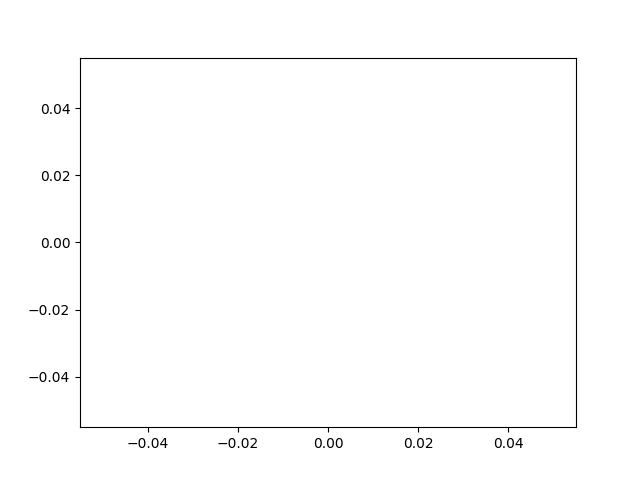

In [41]:
eeg_animation = EEGAnimation(eeg_data)
eeg_animation.run_animation()
